# Project description

> This is a project that tells a story on how the world food shortage problem can be solved using appropriate visuals.

#### Imprtant questions to answer

> Trends in food production and consumption over the years.

>Average and median food production, the outliers, Quartile and interquartile ranges.

>A comparison between average food consumption and production for each year.


### Steps taken

> Import libraries

> Import the dataset

> Perform the EDA

> Answer the relevant question

In [1]:
# import the libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# import production dataset
prod_df = pd.read_csv('Africa_Food_Production.csv')
prod_df.head(3)

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688


In [3]:
# import supply dataset
supply_df = pd.read_csv('Africa Food Supply (2004 - 2013).csv')
supply_df.head(3)

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047


In [4]:
# print the shape for both dataset
print(prod_df.shape)
print(supply_df.shape)

(23110, 4)
(450, 3)


In [5]:
# check the production datatype 
prod_df.dtypes

Country    object
Item       object
Year        int64
Value       int64
dtype: object

In [6]:
# check the supply datatype 
supply_df.dtypes

Country    object
Year        int64
Value       int64
dtype: object

In [7]:
# check the missing value for production
prod_df.isnull().sum()

Country    0
Item       0
Year       0
Value      0
dtype: int64

In [8]:
# check the missing value for supply
supply_df.isnull().sum()

Country    0
Year       0
Value      0
dtype: int64

In [9]:
# groupby the country, year and value
prod = pd.DataFrame(prod_df.groupby(['Country', 'Year'])['Value'].sum()).reset_index()
prod

,Country,Year,Value
0,Algeria,2004,15536
1,Algeria,2005,15667
2,Algeria,2006,16417
3,Algeria,2007,14763
4,Algeria,2008,13841
...,...,...,...
445,Zimbabwe,2009,5754
446,Zimbabwe,2010,6777
447,Zimbabwe,2011,7551
448,Zimbabwe,2012,8173


In [10]:
# groupby the country, year, value
supply = pd.DataFrame(supply_df.groupby(['Country', 'Year'])['Value'].sum()).reset_index()
supply

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048
...,...,...,...
445,Zimbabwe,2009,2147
446,Zimbabwe,2010,2168
447,Zimbabwe,2011,2200
448,Zimbabwe,2012,2197


## Data Exploration

> Trends in food production over the years

In [11]:
# default color of visualization
base_color = sb.color_palette()[0]

In [12]:
#average production value by year
prod_df.groupby('Year')['Value'].mean()

Year
2004    286.767301
2005    298.986592
2006    310.814014
2007    305.215830
2008    318.686851
2009    323.040657
2010    340.166955
2011    351.303633
2012    364.831816
2013    378.227568
Name: Value, dtype: float64

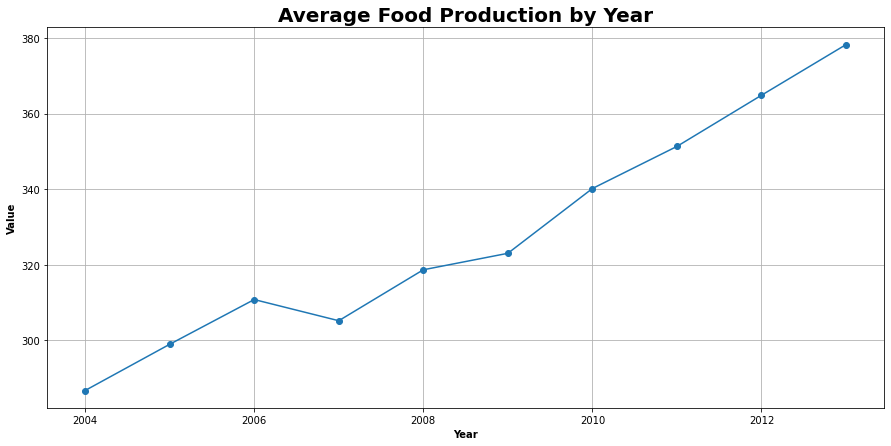

In [13]:
#plotting line chart to show trends over the years
fig= plt.figure(figsize=(15, 7))
plt.plot(prod_df.groupby('Year')['Value'].mean(), marker='o', color=base_color)
plt.title('Average Food Production by Year', fontsize = 20, fontweight = 'bold')
plt.xlabel('Year', fontsize = 10, fontweight = 'bold')
plt.ylabel('Value', fontsize = 10, fontweight = 'bold')
plt.grid()
plt.show();
#fig.savefig('food prod by year.jpg')

In [14]:
#Median food production by year
prod_df.groupby('Year')['Value'].median()

Year
2004    16.0
2005    16.0
2006    17.0
2007    17.0
2008    18.0
2009    18.0
2010    20.0
2011    21.0
2012    21.0
2013    22.0
Name: Value, dtype: float64

In [15]:
#creating a new dataframe called country production... it contains the average production value for each country
country_prod = pd.DataFrame(prod_df.groupby('Country')['Value'].mean()).reset_index(inplace=False) 
country_prod

,Country,Value
0,Algeria,325.258621
1,Angola,362.035185
2,Benin,149.274576
3,Botswana,14.141176
4,Burkina Faso,232.858140
5,Cabo Verde,5.024242
6,Cameroon,304.107692
7,Central African Republic,55.380000
8,Chad,115.584615
9,Congo,51.582000


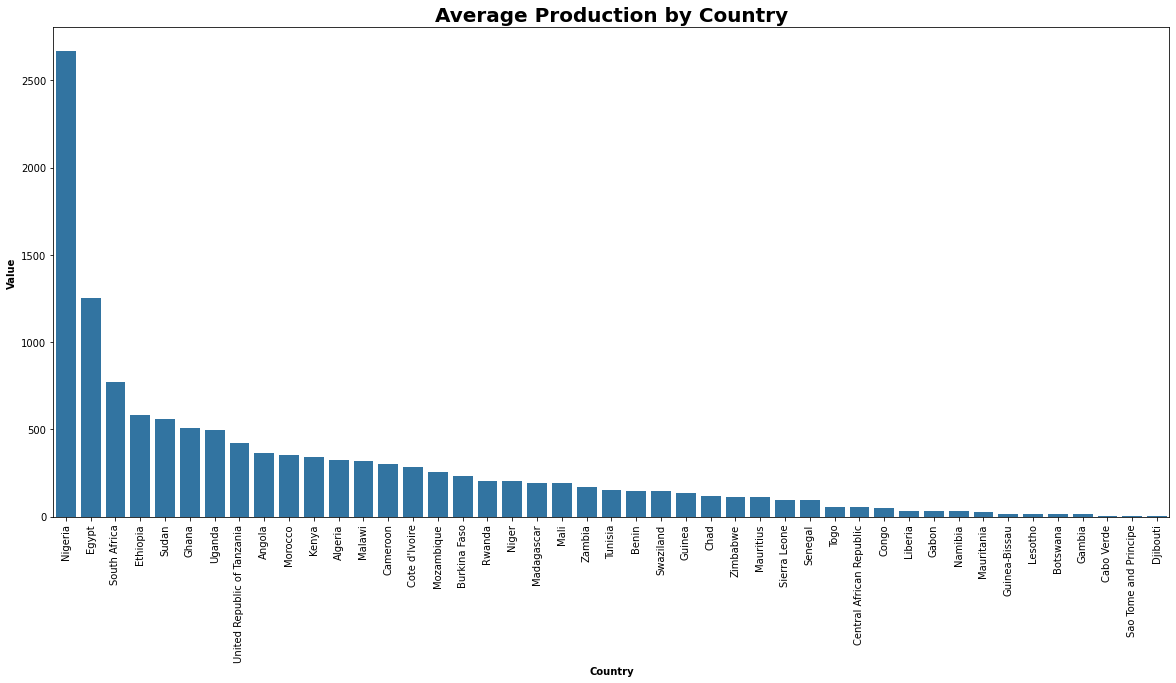

In [16]:
country_sorted = country_prod.sort_values('Value', ascending=False)
plt.figure(figsize = [20, 9])
plt.xticks(rotation=90)
sb.barplot('Country', 'Value', data = country_sorted, color = base_color)
#sb.barplot(country_prod['Country'], country_prod['Value'], color = base_color)
plt.xlabel('Country', fontsize = 10, fontweight = 'bold')
plt.ylabel('Value', fontsize = 10, fontweight = 'bold')
plt.title('Average Production by Country', fontsize = 20, fontweight = 'bold')
plt.show();

In [17]:
item_prod= pd.DataFrame(prod_df.groupby('Item')['Value'].mean()).reset_index(inplace=False)

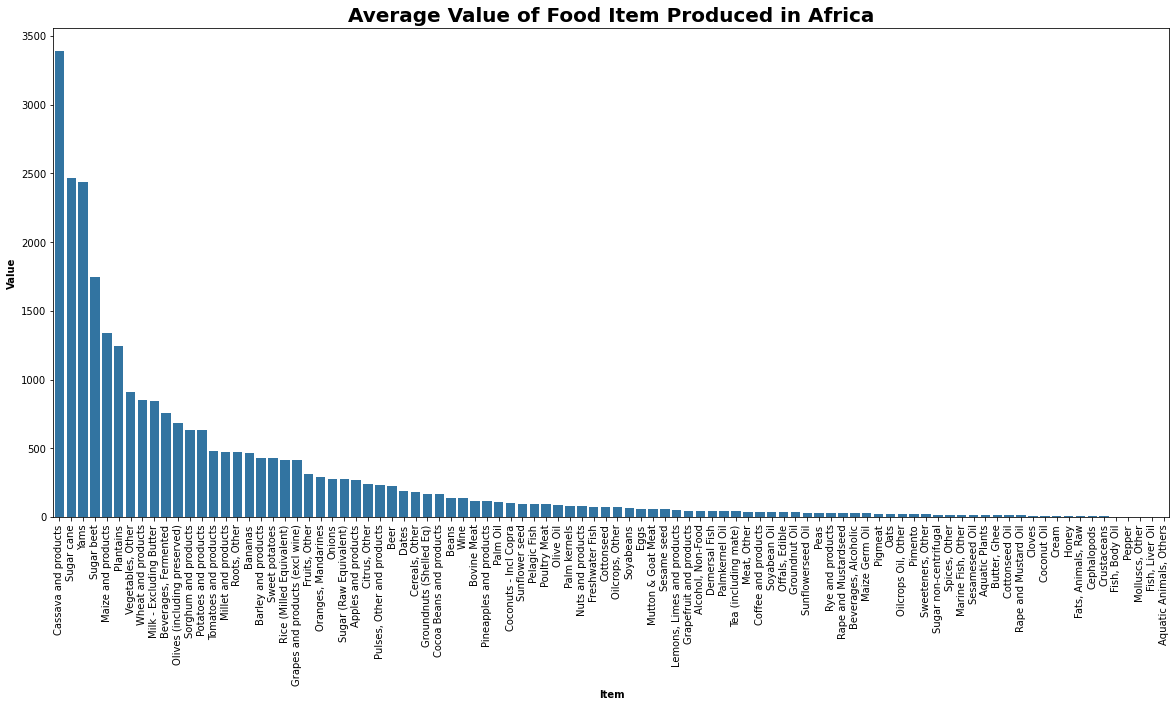

In [18]:
item_sorted= item_prod.sort_values('Value', ascending=False)
plt.figure(figsize = [20, 9])
plt.xticks(rotation=90)
sb.barplot('Item', 'Value', data = item_sorted, color = base_color)
plt.xlabel('Item', fontsize = 10, fontweight = 'bold')
plt.ylabel('Value', fontsize = 10, fontweight = 'bold')
plt.title('Average Value of Food Item Produced in Africa', fontsize = 20, fontweight = 'bold')
plt.show();

## Average food supply by each country

In [19]:
country_supply = pd.DataFrame(supply.groupby('Country')['Value'].mean()).reset_index(inplace=False)
country_supply

,Country,Value
0,Algeria,3111.8
1,Angola,2255.6
2,Benin,2537.8
3,Botswana,2226.3
4,Burkina Faso,2607.2
5,Cabo Verde,2551.4
6,Cameroon,2460.3
7,Central African Republic,2071.9
8,Chad,2051.1
9,Congo,2153.0


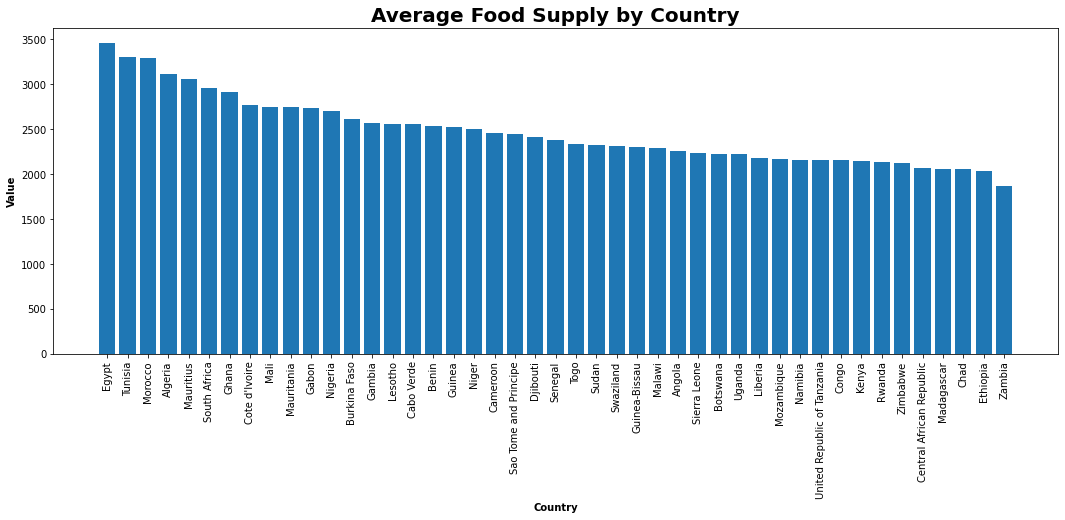

In [20]:
Average_supply = country_supply.sort_values('Value', ascending=False)
fig= plt.figure(figsize=(18, 6))
plt.bar('Country','Value', data = Average_supply, color = base_color)
plt.title('Average Food Supply by Country', fontsize=20, fontweight = 'bold')
plt.xlabel('Country', fontsize=10, fontweight = 'bold')
plt.ylabel('Value', fontsize=10, fontweight = 'bold')
plt.xticks(rotation=90)
plt.show();

## Trends in food supply over the years

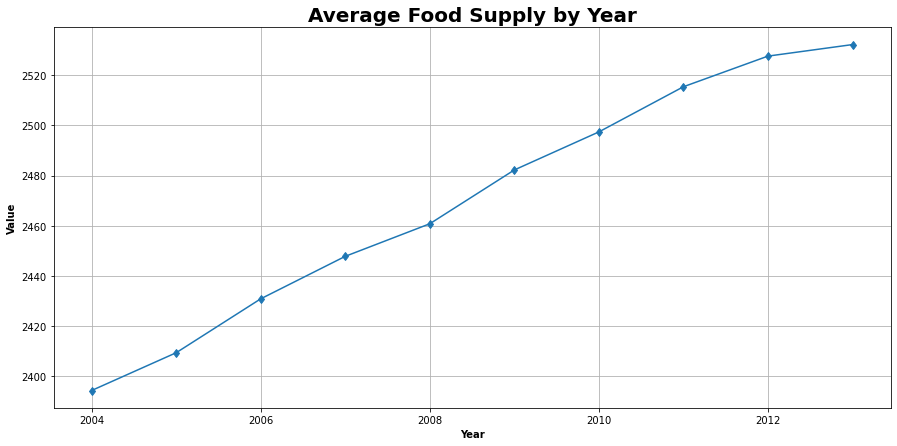

In [21]:
#plotting line chart to show trends
fig= plt.figure(figsize=(15, 7))
plt.plot(supply_df.groupby('Year')['Value'].mean(), marker='d', color = base_color)
plt.title('Average Food Supply by Year', fontsize = 20, fontweight = 'bold')
plt.xlabel('Year', fontsize = 10, fontweight = 'bold')
plt.ylabel('Value', fontsize = 10, fontweight = 'bold')
plt.grid()
plt.show();

## Comparison between average food consumption and production for each year

In [22]:
#creating a new dataframe that shows the average number of food item produced each year
food_pro = pd.DataFrame(prod_df.groupby('Year')['Value'].mean()).reset_index(inplace= False)
food_pro

,Year,Value
0,2004,286.767301
1,2005,298.986592
2,2006,310.814014
3,2007,305.215830
4,2008,318.686851
5,2009,323.040657
6,2010,340.166955
7,2011,351.303633
8,2012,364.831816
9,2013,378.227568


In [23]:
#renaming the value column to reflect what the new column stands for
food_pro.rename(columns = {'Value': 'Avg_food_produced'}, inplace=True)

In [24]:
#creating a new dataframe that shows the average number of food item supplied each year
food_supply = pd.DataFrame(supply_df.groupby('Year')['Value'].mean()).reset_index(inplace= False)
food_supply

,Year,Value
0,2004,2394.222222
1,2005,2409.288889
2,2006,2430.800000
3,2007,2447.755556
4,2008,2460.755556
5,2009,2482.222222
6,2010,2497.400000
7,2011,2515.422222
8,2012,2527.644444
9,2013,2532.244444


In [25]:
#renaming the value column to reflect what the new column stands for
food_supply.rename(columns = {'Value': 'Avg_food_supplied'}, inplace=True)

### Merging the new dataframes

In [26]:
prod_n_sup = pd.merge(food_pro, food_supply, on='Year')
prod_n_sup

,Year,Avg_food_produced,Avg_food_supplied
0,2004,286.767301,2394.222222
1,2005,298.986592,2409.288889
2,2006,310.814014,2430.800000
3,2007,305.215830,2447.755556
4,2008,318.686851,2460.755556
5,2009,323.040657,2482.222222
6,2010,340.166955,2497.400000
7,2011,351.303633,2515.422222
8,2012,364.831816,2527.644444
9,2013,378.227568,2532.244444


### Creating a chart of new dataframe

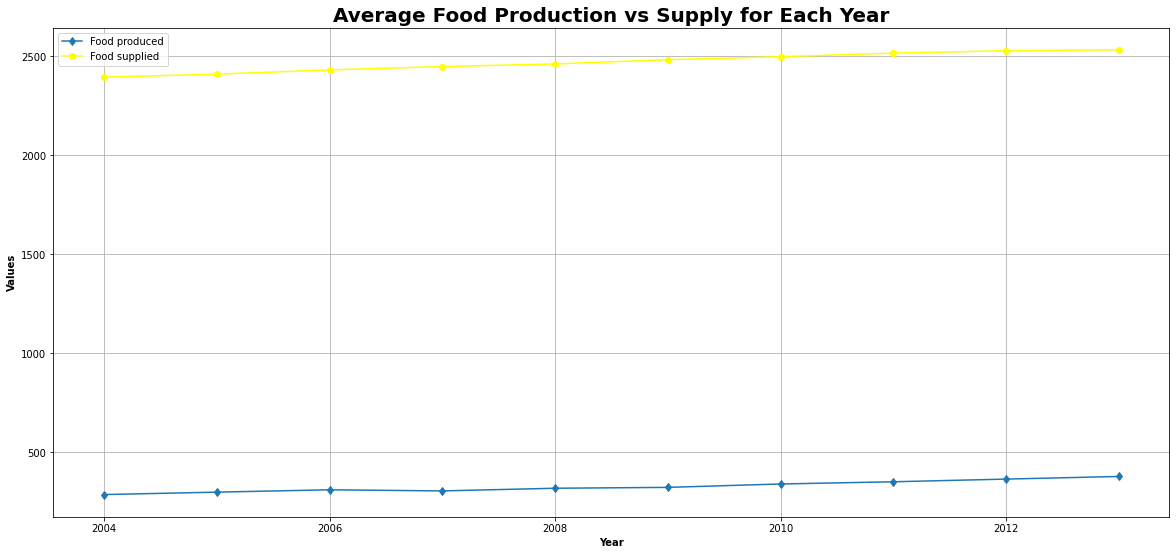

In [27]:
fig= plt.figure(figsize=(20,9))

ax = fig.add_subplot() 
ax.plot(prod_n_sup['Year'],prod_n_sup['Avg_food_produced'],marker='d', label="Food produced", color = base_color)
ax.plot(prod_n_sup['Year'],prod_n_sup['Avg_food_supplied'],marker='o', label="Food supplied", color = 'yellow')

ax.set_ylabel('Values', fontsize = 10, fontweight = 'bold')
ax.set_title('Average Food Production vs Supply for Each Year', fontsize = 20, fontweight = 'bold')
ax.set_xlabel('Year', fontsize = 10, fontweight = 'bold')
ax.legend()
plt.grid()
plt.show();

### Average and Median Food Production

In [28]:
#average and median food production
average_food_production= prod_df['Value'].mean()
print(f" The average number of food produced in Africa from 2004 to 2013 is {round(average_food_production,2)}kt")

median_food_production= prod_df['Value'].median()
print(f" The median food production value is {median_food_production}kt")

 The average number of food produced in Africa from 2004 to 2013 is 327.79kt
 The median food production value is 18.0kt


### Outliers

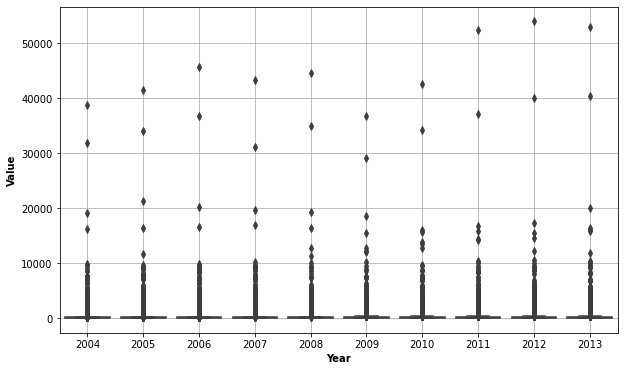

In [29]:
#boxplot for food production data

plt.figure(figsize = [10, 6]) 
sb_p = sb.boxplot(x = 'Year', y = 'Value', data = prod_df)
plt.xlabel('Year', fontsize = 10, fontweight = 'bold')
plt.ylabel('Value', fontsize = 10, fontweight = 'bold')
plt.grid()
plt.show();

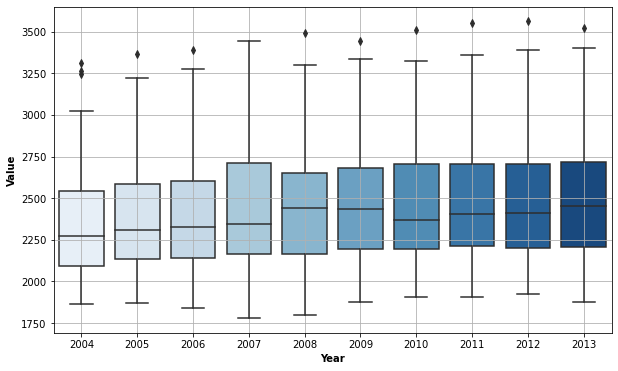

In [30]:
#box plot for food supply dataset

plt.figure(figsize = [10, 6])
sb_plot = sb.boxplot(x = 'Year', y = 'Value', data = supply_df, palette = 'Blues')
plt.xlabel('Year', fontsize = 10, fontweight = 'bold')
plt.ylabel('Value', fontsize = 10, fontweight = 'bold')
plt.grid()
plt.show();

## Investigating Outliers

### Interquartile ranges (IQR)

In [31]:
#25th percentile Q1
Q1= np.percentile(prod_df['Value'],25)
print(f"The Q1 value for food production data is {Q1}")

#75th percentile Q3
Q3= np.percentile(prod_df['Value'],75)
print(f"The Q3 value for food production data is {Q3}")

#Calculating the IQR
IQR= Q3-Q1
print(f"The IQR for food production data is {IQR}")

The Q1 value for food production data is 3.0
The Q3 value for food production data is 108.0
The IQR for food production data is 105.0


In [32]:
#calculating lower bound and upper bound values
lower_bound= Q1 - (1.5 * IQR)
print(f"lower_bound value for food production data is {lower_bound}")

upper_bound= Q3 + (1.5 * IQR)
print(f"upper_bound value for food production data is {upper_bound}")

lower_bound value for food production data is -154.5
upper_bound value for food production data is 265.5


In [33]:
prod_outlier = prod_df[((prod_df['Value'] <= (lower_bound)) | (prod_df['Value'] >= (upper_bound)))]
prod_outlier. sort_values('Value', ascending = False)

,Country,Item,Year,Value
15448,Nigeria,Cassava and products,2012,54000
15449,Nigeria,Cassava and products,2013,53000
15447,Nigeria,Cassava and products,2011,52403
15442,Nigeria,Cassava and products,2006,45721
15444,Nigeria,Cassava and products,2008,44582
...,...,...,...,...
4285,Chad,Milk - Excluding Butter,2009,266
18038,South Africa,Sunflowerseed Oil,2012,266
443,Algeria,Poultry Meat,2007,266
9741,Kenya,Beer,2005,266


- Based on the lower and upper bound calculations, there are 3696 outliers in the food production dataset with extreme outliers which in this case are the food production values in Nigeria for each year

### Investigating outliers in the food supply dataset

In [34]:
#25th percentile Q1
quartile_1 = np.percentile(supply_df['Value'],25)
print(f"The Q1 value of the food supply data is {quartile_1}")

#75th percentile Q3
quartile_3 = np.percentile(supply_df['Value'],75)
print(f"The Q3 value of the food supply data is {quartile_3}")

The Q1 value of the food supply data is 2174.0
The Q3 value of the food supply data is 2681.75


In [35]:
#Calculating the IQR
IQR= quartile_3 - quartile_1
print(f" The IQR value of the food supply data is {IQR}")

 The IQR value of the food supply data is 507.75


In [36]:
#calculating lower bound and upper bound values
lower_bound= quartile_1 - (1.5 * IQR)
print(f"The lower_bound value for the food supply data is {lower_bound}")

upper_bound= quartile_3 + (1.5 * IQR)
print(f"The upper_bound value for the food supply data is {upper_bound}")

The lower_bound value for the food supply data is 1412.375
The upper_bound value for the food supply data is 3443.375


- any value below the lower bound or above the upper bound is considered an outlier

In [37]:
sup_outlier = supply_df[((supply_df['Value'] <= (lower_bound)) | (supply_df['Value'] >= (upper_bound)))]
sup_outlier

,Country,Year,Value
123,Egypt,2007,3445
124,Egypt,2008,3490
126,Egypt,2010,3507
127,Egypt,2011,3549
128,Egypt,2012,3561
129,Egypt,2013,3522


- Although Nigeria produced the highest number of food, Egypt had the most food supplies/consumption in Africa from 2007 till 2013